## Toucan

In [1]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown

import scipy.stats

import warnings
warnings.filterwarnings("ignore")

In [35]:
df_toucan = pd.read_csv('data/toucan-with-methodology.csv')
df_toucan.head(5)

,Issuance Date,Vintage Start,Vintage End,ID,Name,Country,Project Type,Methodology,Total Vintage Quantity,Credits Quantity Issued,Serial Number,Additional Certifications,Retirement/Cancellation Date,Retirement Beneficiary,Retirement Reason,Retirement Details
0,21/10/2021,01/04/2016,31/12/2016,493,5 MW Brahm Ganga Hydro – Electric Project at K...,India,Energy industries (renewable/non-renewable sou...,Grid connected renewable electricity generation,"17,058","17,058",11522-337737512-337754569-VCS-VCU-291-VER-IN-1...,NaN,27/10/2021,0x00000016F127c94A667Ae3C9fDF0C31c9C79826f,Other,TOUCAN-1.0-137-0x293c24f8dedbd5e6a881cfdef1118...
1,21/10/2021,01/01/2017,31/12/2017,535,78 MW AKOCAK Hydroelectric Power Plant,Turkey,Energy industries (renewable/non-renewable sou...,Grid-connected electricity generation from ren...,"106,299","28,580",11543-338158113-338186692-VCS-VCU-279-VER-TR-1...,NaN,22/10/2021,0xEE66Bfe308c0DeCe0F25c46B254df50cea743674,Other,TOUCAN-1.0-137-0xf3a3d76f71677ca3583ff35c9bacb...
2,21/10/2021,01/01/2017,31/12/2017,493,5 MW Brahm Ganga Hydro – Electric Project at K...,India,Energy industries (renewable/non-renewable sou...,Grid connected renewable electricity generation,"19,588","19,588",11523-337754570-337774157-VCS-VCU-291-VER-IN-1...,NaN,27/10/2021,0x00000016f127c94a667ae3c9fdf0c31c9c79826f,Other,TOUCAN-1.0-137-0x501bc0bb8a2f05cd800f3f52904a4...
3,21/10/2021,01/01/2018,01/04/2018,493,5 MW Brahm Ganga Hydro – Electric Project at K...,India,Energy industries (renewable/non-renewable sou...,Grid connected renewable electricity generation,"1,586","1,586",11524-337774158-337775743-VCS-VCU-291-VER-IN-1...,NaN,27/10/2021,0x00000016F127c94A667Ae3C9fDF0C31c9C79826f,Other,TOUCAN-1.0-137-0x95a59956950b5792471c1895587fe...
4,21/10/2021,01/01/2018,31/12/2018,535,78 MW AKOCAK Hydroelectric Power Plant,Turkey,Energy industries (renewable/non-renewable sou...,Grid-connected electricity generation from ren...,"137,940","68,970",11544-338211297-338280266-VCS-VCU-279-VER-TR-1...,NaN,24/10/2021,0xEE66Bfe308c0DeCe0F25c46B254df50cea743674,Other,TOUCAN-1.0-137-0x720ac7c4bff7b67cbd80125696a9b...


In [36]:
toucan_id = df_toucan.groupby('ID').sum().index
toucan_id

Index([  10,   12,  132,  173,  251,  265,  274,  292,  293,  414,
       ...
       1686, 1693, 1742, 1748, 1758, 1762, 1792, 2092, 2095, 2097],
      dtype='int64', name='ID', length=104)

In [37]:
toucan = ['VCS' + str(item) for item in toucan_id]
toucan

['VCS10',
 'VCS12',
 'VCS132',
 'VCS173',
 'VCS251',
 'VCS265',
 'VCS274',
 'VCS292',
 'VCS293',
 'VCS414',
 'VCS426',
 'VCS439',
 'VCS487',
 'VCS493',
 'VCS499',
 'VCS513',
 'VCS528',
 'VCS529',
 'VCS535',
 'VCS566',
 'VCS603',
 'VCS612',
 'VCS614',
 'VCS631',
 'VCS653',
 'VCS655',
 'VCS670',
 'VCS674',
 'VCS699',
 'VCS713',
 'VCS722',
 'VCS725',
 'VCS728',
 'VCS733',
 'VCS753',
 'VCS755',
 'VCS758',
 'VCS762',
 'VCS766',
 'VCS786',
 'VCS788',
 'VCS792',
 'VCS810',
 'VCS812',
 'VCS823',
 'VCS830',
 'VCS836',
 'VCS837',
 'VCS875',
 'VCS892',
 'VCS896',
 'VCS903',
 'VCS905',
 'VCS917',
 'VCS927',
 'VCS934',
 'VCS981',
 'VCS982',
 'VCS985',
 'VCS986',
 'VCS1002',
 'VCS1052',
 'VCS1100',
 'VCS1121',
 'VCS1146',
 'VCS1160',
 'VCS1162',
 'VCS1166',
 'VCS1186',
 'VCS1187',
 'VCS1188',
 'VCS1189',
 'VCS1190',
 'VCS1203',
 'VCS1301',
 'VCS1310',
 'VCS1356',
 'VCS1382',
 'VCS1418',
 'VCS1427',
 'VCS1464',
 'VCS1477',
 'VCS1497',
 'VCS1499',
 'VCS1506',
 'VCS1525',
 'VCS1529',
 'VCS1542',
 'VCS1

In [5]:
main_df = pd.read_csv('data/df_main')
main_df.head()

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project
0,ACR101,AFOVERT Energy,ACR,No,Canceled,Household & Community,Bundled Energy Efficiency,Reduction,AMS-I.E. Switch from Non-Renewable Biomass for...,Sub Saharan Africa,...,Niono District,Niono,Katene Kadji,0,0,0,0,NaN,NaN,NaN
1,ACR102,Air Bag Gas Substitution,ACR,No,Completed,Chemical Processes,SF6 Replacement,Reduction,Emission reductions through industrial gas sub...,North America,...,OREGON,Beaverton,Nike,7984006,17666,7966340,0,NaN,NaN,2003.0
2,ACR103,Inland Empire Anaerobic Ag Digester,ACR,No,Completed,Agriculture,Manure Methane Digester,Reduction,Anaerobic Digestion,North America,...,CALIFORNIA,Chino,Inland Empire Utilities Agency,44202,44202,0,0,NaN,NaN,2003.0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,ACR,No,Inactive,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,Sub Saharan Africa,...,Miandrivazo,Ankotrofotsy,Tany Meva Foundation,0,0,0,0,NaN,NaN,NaN
4,ACR105,Boa Vista A/R,ACR,No,Canceled,Forestry & Land Use,Afforestation/Reforestation,Impermanent Removal,AR-ACM0001,South America,...,Roraima,Boa Vista,F.I.T Timber Ltd,2572210,2572210,0,0,NaN,NaN,2011.0


In [6]:
just_toucan_df = main_df[main_df['Project ID'].isin(toucan)]
just_toucan_df

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,State,Project Site Location,Project Developer,Total Credits \nIssued,Total Credits \nRetired,Total Credits Remaining,Total Buffer \nPool Deposits,Reversals Covered by Buffer Pool,Reversals Not Covered by Buffer,First Year of Project
4355,VCS10,BAESA Project,VCS,No,Registered,Renewable Energy,Hydropower,Reduction,ACM0002,South America,...,NaN,NaN,Multiple Proponents,6726799,3802757,2924042,0,NaN,NaN,2006.0
4359,VCS1002,Natural Gas based grid connected power project...,VCS,No,Registered,Industrial & Commercial,Natural Gas Electricity Generation,Reduction,AM0029,South Asia,...,NaN,NaN,GVK Industries Limited,2600983,2224099,376884,0,NaN,NaN,2009.0
4413,VCS1052,North Pikounda REDD+,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0011,Sub Saharan Africa,...,NaN,NaN,Multiple Proponents,56209,56196,13,20007,NaN,NaN,2012.0
4467,VCS1100,SANIBEY DAM AND HYDROELECTRIC POWER PLANT,VCS,No,Registered,Renewable Energy,Hydropower,Reduction,ACM0002,Middle East,...,NaN,NaN,''SANKO Enerji Sanayi ve Ticaret A.Ş,4596206,850769,3745437,0,NaN,NaN,2012.0
4490,VCS1121,Anhui Guzhen Biomass Generation Project,VCS,No,Crediting Period Renewal Requested,Renewable Energy,Biomass,Reduction,ACM0018,East Asia,...,NaN,NaN,"NATIONAL GUZHEN BIO ENERGY CO.,LTD.",720192,416783,303409,0,NaN,NaN,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,VCS934,The Mai Ndombe REDD+ Project,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0009,Sub Saharan Africa,...,NaN,NaN,Wildlife Works Carbon LLC,37025604,3358193,33667411,3799538,NaN,NaN,2011.0
7911,VCS981,ADPML PORTEL-PARA REDD PROJECT,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0015,South America,...,NaN,NaN,Avoided Deforestation Project (Manaus) Limited...,10060355,3468037,6592318,1348671,NaN,NaN,2012.0
7912,VCS982,Combined cycle natural gas based grid connecte...,VCS,No,Registered,Industrial & Commercial,Natural Gas Electricity Generation,Reduction,AM0029,South Asia,...,NaN,NaN,GVK Industries Limited,1407860,1174133,233727,0,NaN,NaN,2009.0
7915,VCS985,Cordillera Azul National Park REDD Project,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0007,South America,...,NaN,NaN,"CIMA, Cordillera Azul",36612042,10648689,25963353,4068005,NaN,NaN,2012.0


In [7]:
df_credits_remaining_by_vintage = pd.read_csv('data/df_credits_remaining_by_vintage')
df_credits_remaining_by_vintage.head()

,Project ID,Project Name,1996,1997,1998,1999,2000,2001,2002,2003,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ACR101,AFOVERT Energy,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACR102,Air Bag Gas Substitution,0,0,0,0,0,0,0,1890716,...,0,0,0,0,0,0,0,0,0,0
2,ACR103,Inland Empire Anaerobic Ag Digester,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ACR104,Ankotrofotsy Community-based Reforestation and...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ACR105,Boa Vista A/R,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
toucan_df_credits_remaining = just_toucan_df.merge(df_credits_remaining_by_vintage, on=['Project ID', 'Project Name'], how='left')
toucan_df_credits_remaining

,Project ID,Project Name,Voluntary Registry,ARB \nProject,Voluntary Status,Scope,Type,Reduction / Removal,Methodology / Protocol,Region,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,VCS10,BAESA Project,VCS,No,Registered,Renewable Energy,Hydropower,Reduction,ACM0002,South America,...,366180,1061921,380532,0,0,0,0,0,0,0
1,VCS1002,Natural Gas based grid connected power project...,VCS,No,Registered,Industrial & Commercial,Natural Gas Electricity Generation,Reduction,AM0029,South Asia,...,0,0,0,0,0,0,0,0,0,0
2,VCS1052,North Pikounda REDD+,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0011,Sub Saharan Africa,...,0,0,0,0,0,0,0,0,0,0
3,VCS1100,SANIBEY DAM AND HYDROELECTRIC POWER PLANT,VCS,No,Registered,Renewable Energy,Hydropower,Reduction,ACM0002,Middle East,...,0,218965,572720,353741,380281,439976,609312,502516,0,0
4,VCS1121,Anhui Guzhen Biomass Generation Project,VCS,No,Crediting Period Renewal Requested,Renewable Energy,Biomass,Reduction,ACM0018,East Asia,...,0,0,82,40000,0,15000,110958,22679,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,VCS934,The Mai Ndombe REDD+ Project,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0009,Sub Saharan Africa,...,2583673,2583173,1734157,2357083,4507571,5768118,6099622,6980543,0,0
100,VCS981,ADPML PORTEL-PARA REDD PROJECT,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0015,South America,...,708044,1070504,1203953,1271426,1380813,0,0,0,0,0
101,VCS982,Combined cycle natural gas based grid connecte...,VCS,No,Registered,Industrial & Commercial,Natural Gas Electricity Generation,Reduction,AM0029,South Asia,...,0,0,0,0,0,0,0,0,0,0
102,VCS985,Cordillera Azul National Park REDD Project,VCS,No,Registered,Forestry & Land Use,REDD+,Mixed,VM0007,South America,...,53302,244485,1225412,3409604,3929196,6361030,4737495,4739179,0,0


In [32]:
combined_df = pd.DataFrame()

for project_id in toucan_df_credits_remaining['Project ID']:  # Assuming project_id_list is the list of project IDs
    id_df = toucan_df_credits_remaining[toucan_df_credits_remaining['Project ID'] == project_id]

    id_df = pd.melt(id_df, id_vars=['Project ID', 'Project Name'], var_name='Year', value_name='Value')
    id_df['Year'] = pd.to_numeric(id_df['Year'], errors='coerce')
    id_df_yearly_sums = id_df.groupby('Year')['Value'].sum()

    combined_df[project_id] = id_df_yearly_sums

combined_df = combined_df.reset_index()
combined_df.columns = ['Year'] + combined_df.columns.tolist()[1:]

In [33]:
combined_df.columns

Index(['Year', 'VCS10', 'VCS1002', 'VCS1052', 'VCS1100', 'VCS1121', 'VCS1146',
       'VCS1160', 'VCS1162', 'VCS1166',
       ...
       'VCS896', 'VCS903', 'VCS905', 'VCS917', 'VCS927', 'VCS934', 'VCS981',
       'VCS982', 'VCS985', 'VCS986'],
      dtype='object', length=105)

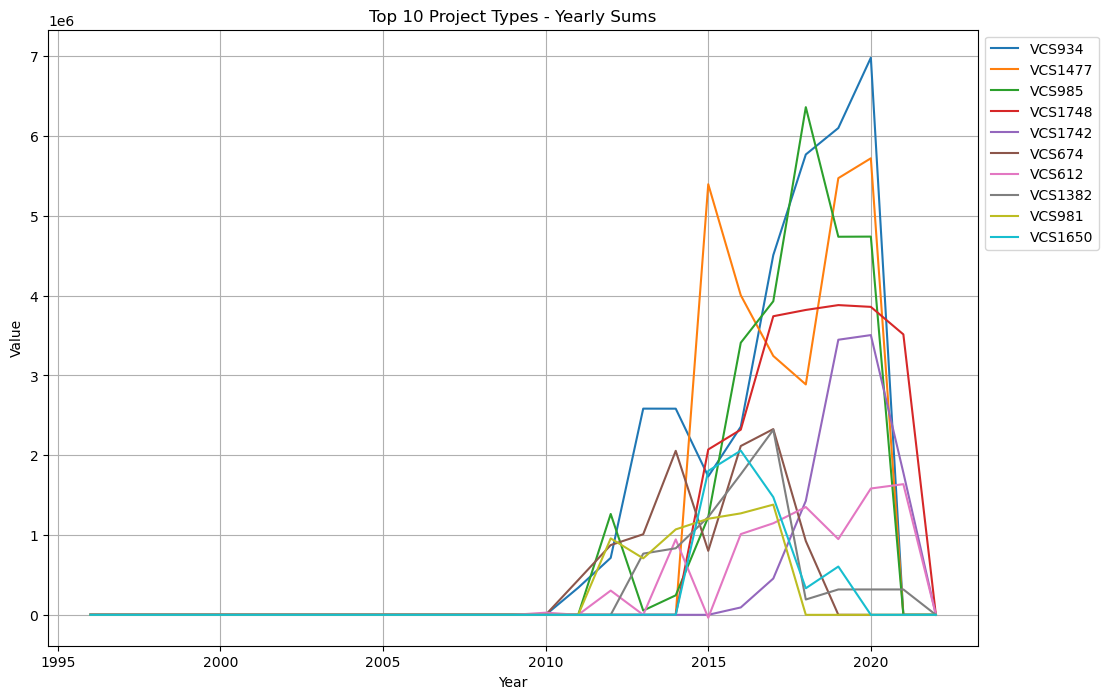

In [34]:
combined_df.set_index('Year', inplace=True)

top_10_types = combined_df.sum(axis=0).sort_values(ascending=False).head(10).index
top_10_df = combined_df[top_10_types]

plt.figure(figsize=(12, 8))

for project_type in top_10_df.columns:
    plt.plot(top_10_df.index, top_10_df[project_type], label=project_type)

plt.title('Top 10 Project Types - Yearly Sums')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Adjust the legend position if needed
plt.grid(True)
plt.savefig('types.png')
plt.show()

In [39]:
toucan_df_credits_remaining.to_csv('data/toucan_df_credits_remaining.csv', index=False)